In [3]:
!pip install "distilabel[hf-inference-endpoints]" "huggingface-hub" "model2vec" "semhash" -U -q

In [4]:
!pip install anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 4.6 MB/s eta 0:00:00


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from datasets import load_dataset, Dataset
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromHub
from distilabel.steps.tasks import SelfInstruct, EvolInstruct, TextGeneration
from distilabel.models.llms.huggingface import InferenceEndpointsLLM
from semhash import SemHash
from transformers import pipeline
import re

In [7]:
from huggingface_hub import login

login()

In [8]:
from distilabel.steps.tasks import SelfInstruct
from distilabel.llms import AnthropicLLM
from google.colab import userdata

In [112]:
from distilabel.models.llms.huggingface import InferenceEndpointsLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromHub
from distilabel.steps.tasks import SelfInstruct, TextGeneration

with Pipeline() as pipeline1:
    data = LoadDataFromHub(repo_id="dvilasuero/finepersonas-v0.1-tiny", num_examples=10)
    API_KEY = userdata.get('ANTHROPIC_API_KEY')
    llm1 = AnthropicLLM(model="claude-3-opus-20240229", api_key=API_KEY)
    gen_a = SelfInstruct(llm=llm1,
                         input_mappings={"input": "persona"},
                         output_mappings={"instructions": "instructions_string"},  # Add this line
                         )
    #gen_b = EvolInstruct(
    #    llm=llm1, num_evolutions=1, input_mappings={"instruction": "instructions"}
    #)
    #gen_c = TextGeneration(llm=llm1, input_mappings={"instruction": "evolved_instruction"})
    #data >> gen_a >> gen_b >> gen_c
    data >> gen_a

if __name__ == "__main__":
    distiset1 = pipeline1.run(use_cache=False)

[03/30/25 17:04:31] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=239528;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=387505;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_load_data_from_hub_0_self_ins             
                             truct_0/09fd91430fefc9e3b3a34817cdead6b285f4fc68/executions/8c2baf6ad4255             
                             ae02276ac76a777944fd8087fd0/data/steps_outputs'                                       

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=616753;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=566942;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_hub_0'                                                        
                                - 🔄 'self_instruct_0'                                                             

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=824238;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=910401;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

[03/30/25 17:04:33] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 2/2                 ]8;id=620655;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=285564;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_hub_0' replicas: 1/1                                               
                              * 'self_instruct_0' replicas: 1/1                                                    

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=89493;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=60123;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1422\1422]8;;\

                    INFO     ['distilabel.step.load_data_from_hub_0'] 🚰 Starting yielding      ]8;id=201218;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=449398;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             batches from generator step 'load_data_from_hub_0'. Offset: 0                         

                    INFO     ['distilabel.step.load_data_from_hub_0'] 📨 Step                   ]8;id=574150;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=980285;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             'load_data_from_hub_0' sending batch 0 to output queue                                

                    INFO     ['distilabel.step.load_data_from_hub_0'] 🏁 Finished running step  ]8;id=143482;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=717180;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'load_data_from_hub_0' (replica ID: 0)                                                

                    INFO     ['distilabel.step.self_instruct_0'] 📦 Processing batch 0 in       ]8;id=632993;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=313681;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'self_instruct_0' (replica ID: 0)                                                     

[03/30/25 17:04:38] INFO     ['distilabel.step.self_instruct_0'] 📨 Step 'self_instruct_0'      ]8;id=677038;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=89307;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.self_instruct_0'] 🏁 Finished running step       ]8;id=13614;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=351355;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'self_instruct_0' (replica ID: 0)                                                     

Generating train split: 0 examples [00:00, ? examples/s]

In [113]:
distiset1

Distiset({
    default: DatasetDict({
        train: Dataset({
            features: ['id', 'persona', 'model_name_embeddings', 'embedding', 'nn_indices', 'nn_scores', 'projection', 'cluster_label', 'summary_label', 'instructions_string', 'distilabel_metadata', 'model_name'],
            num_rows: 10
        })
    })
})

In [114]:
distiset1["default"]["train"][:1]

{'id': ['<urn:uuid:ab0a5c2f-e34c-4781-8bf8-6a3d1fd82649>'],
 'persona': ['A local art historian and museum professional interested in 19th-century American art and the local cultural heritage of Cincinnati.'],
 'model_name_embeddings': ['Alibaba-NLP/gte-large-en-v1.5'],
 'embedding': [[0.022470641881227493,
   -0.017901265993714333,
   -0.011149224825203419,
   -0.009838403202593327,
   0.06471165269613266,
   0.0012222680961713195,
   -0.008083968423306942,
   0.010446570813655853,
   0.027933161705732346,
   -0.003492367221042514,
   -0.0016492221038788557,
   -0.018603043630719185,
   -0.026195602491497993,
   0.013342684134840965,
   0.029528848826885223,
   -0.012724010273814201,
   0.04400356486439705,
   0.02568618580698967,
   -0.026229774579405785,
   0.010847513563930988,
   -0.0075478991493582726,
   -0.033124785870313644,
   0.012729826383292675,
   -0.06576181948184967,
   -2.403297730779741e-05,
   0.05924610793590546,
   0.0002483728458173573,
   -0.020761199295520782,
 

In [37]:
distiset1

Distiset({
    default: DatasetDict({
        train: Dataset({
            features: ['id', 'persona', 'model_name_embeddings', 'embedding', 'nn_indices', 'nn_scores', 'projection', 'cluster_label', 'summary_label', 'instructions_string', 'distilabel_metadata', 'model_name'],
            num_rows: 1
        })
    })
})

Example using a single hard coded instruction. We later plug in the instructions from Self instruct

In [57]:
from distilabel.steps.tasks import EvolInstruct
from distilabel.models import InferenceEndpointsLLM

# Consider this as a placeholder for your actual LLM.
evol_instruct = EvolInstruct(
    llm=llm1,
    num_evolutions=1,
)
evol_instruct.load()

result = next(
    evol_instruct.process([
        {"instruction": "What is the capital of France?"}
    ]
))
result

[03/30/25 16:15:33] WARNING  ['distilabel.step.None'] Step 'None' hasn't received a pipeline, and it    ]8;id=271928;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/base.py\base.py]8;;\:]8;id=205419;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/base.py#222\222]8;;\
                             hasn't been created within a `Pipeline` context. Please, use `with                    
                             Pipeline() as pipeline:` and create the step within the context.                      

[03/30/25 16:15:36] INFO     ['distilabel.step.evol_instruct_0'] 🔄 Ran iteration 0 evolving 1          ]8;id=384449;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/tasks/evol_instruct/base.py\base.py]8;;\:]8;id=656336;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/tasks/evol_instruct/base.py#310\310]8;;\
                             instructions!                                                                         

[{'instruction': 'What is the capital of France?',
  'evolved_instruction': "What is the name of the city that serves as the seat of government and administrative center of the French Republic, as well as the nation's largest and most populous metropolis?",
  'model_name': 'claude-3-opus-20240229',
  'distilabel_metadata': {'statistics_instruction_evol_instruct_0': {'input_tokens': [259],
    'output_tokens': [38]}}}]

In [69]:
distiset1['default']['train'][:1]["instructions_string"][0][0]

"Describe the influence of the Hudson River School on Cincinnati's 19th-century landscape painters."

In [116]:
# Step 1: Grab the full list of lists from the dataset
instruction_lists = distiset1["default"]["train"]["instructions_string"]

# Step 2: Flatten the nested lists and map to dicts
instruction_payloads = [
    {"instruction": instr}
    for sublist in instruction_lists
    for instr in sublist
]

# Optional: preview the first 2 items
instruction_payloads[:]


[{'instruction': 'Tell me about the most influential 19th-century American artists from Cincinnati.'},
 {'instruction': "Describe the unique characteristics of Cincinnati's cultural heritage during the 1800s."},
 {'instruction': 'What were the major art movements that emerged in Cincinnati in the 19th century?'},
 {'instruction': "Explain how Cincinnati's geographical location and history shaped its artistic development."},
 {'instruction': 'Discuss the impact of notable Cincinnati art institutions established in the 19th century on the local art scene.'},
 {'instruction': 'Describe the most significant cultural festival in Cyprus and its historical roots.'},
 {'instruction': "What elements of Cypriot cuisine best reflect the island's unique history and cultural influences?"},
 {'instruction': 'Analyze how the political division of Cyprus has impacted the daily lives and attitudes of its people.'},
 {'instruction': 'Discuss the role of religion in shaping Cypriot society and its influe

In [120]:
from datasets import Dataset

instruction_lists = distiset1["default"]["train"]["instructions_string"]

instruction_payloads = [
    {"instruction": instr}
    for sublist in instruction_lists
    for instr in sublist
]

dataset_for_evol = Dataset.from_list(instruction_payloads)

{'instruction': ["Describe the influence of the Hudson River School on Cincinnati's 19th-century landscape painters."]}


In [121]:
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromDicts
from distilabel.steps.tasks import EvolInstruct
from distilabel.models.llms.anthropic import AnthropicLLM

with Pipeline() as pipeline2:
    data = LoadDataFromDicts(data=dataset_for_evol)
    API_KEY = userdata.get('ANTHROPIC_API_KEY')
    llm1 = AnthropicLLM(model="claude-3-opus-20240229", api_key=API_KEY)

    gen_b = EvolInstruct(
        llm=llm1,
        num_evolutions=1,
        input_mappings={"instruction": "instruction"}
    )

    data >> gen_b

if __name__ == "__main__":
    distiset2 = pipeline2.run(use_cache=False)



[03/30/25 17:07:53] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=875051;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=376937;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_load_data_from_dicts_0_evol_i             
                             nstruct_0/ab1ee93cd27819a3c020d38549631ef6e7bb1a81/executions/80447481c40             
                             d4aa9725a8bb1540238e2b611d9dc/data/steps_outputs'                                     

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=161569;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=872716;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_dicts_0'                                                      
                                - 🔄 'evol_instruct_0'                                                             

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=113956;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=81266;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

[03/30/25 17:07:56] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 2/2                 ]8;id=403124;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=582703;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_dicts_0' replicas: 1/1                                             
                              * 'evol_instruct_0' replicas: 1/1                                                    

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=895464;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=601138;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1422\1422]8;;\

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🚰 Starting yielding    ]8;id=685556;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=631361;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             batches from generator step 'load_data_from_dicts_0'. Offset: 0                       

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 📨 Step                 ]8;id=372081;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=55255;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             'load_data_from_dicts_0' sending batch 0 to output queue                              

                    INFO     ['distilabel.step.evol_instruct_0'] 📦 Processing batch 0 in       ]8;id=968142;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=237611;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'evol_instruct_0' (replica ID: 0)                                                     

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=574692;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=410869;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=726978;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=665180;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=631439;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=979216;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=102754;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=258447;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=9405;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=409979;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=206977;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=223847;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=780769;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=563001;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=320267;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=340716;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=223899;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=280586;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

[03/30/25 17:07:57] INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=297182;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=488090;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=849834;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=511030;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=108760;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=800662;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=609996;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=141876;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=457605;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=589417;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=227119;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=383861;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=58671;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=314506;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=231232;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=170401;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

                    INFO     ['anthropic._base_client'] Retrying request to /v1/messages in    ]8;id=27366;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py\_base_client.py]8;;\:]8;id=210203;file:///usr/local/lib/python3.11/dist-packages/anthropic/_base_client.py#1743\1743]8;;\
                             3.000000 seconds                                                                      

[03/30/25 17:08:03] INFO     ['distilabel.step.evol_instruct_0'] 🔄 Ran iteration 0 evolving 50         ]8;id=913256;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/tasks/evol_instruct/base.py\base.py]8;;\:]8;id=729555;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/tasks/evol_instruct/base.py#310\310]8;;\
                             instructions!                                                                         

                    INFO     ['distilabel.step.evol_instruct_0'] 📨 Step 'evol_instruct_0'      ]8;id=982409;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=998068;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 📨 Step                 ]8;id=955126;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=603266;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             'load_data_from_dicts_0' sending batch 1 to output queue                              

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🏁 Finished running     ]8;id=36555;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=616646;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             step 'load_data_from_dicts_0' (replica ID: 0)                                         

                    INFO     ['distilabel.step.evol_instruct_0'] 📦 Processing batch 1 in       ]8;id=175174;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=507769;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'evol_instruct_0' (replica ID: 0)                                                     

[03/30/25 17:08:07] INFO     ['distilabel.step.evol_instruct_0'] 🔄 Ran iteration 0 evolving 1          ]8;id=33925;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/tasks/evol_instruct/base.py\base.py]8;;\:]8;id=681242;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/tasks/evol_instruct/base.py#310\310]8;;\
                             instructions!                                                                         

                    INFO     ['distilabel.step.evol_instruct_0'] 📨 Step 'evol_instruct_0'      ]8;id=271859;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=826157;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 1 to output queue                                                       

                    INFO     ['distilabel.step.evol_instruct_0'] 🏁 Finished running step       ]8;id=948003;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=489880;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'evol_instruct_0' (replica ID: 0)                                                     

Generating train split: 0 examples [00:00, ? examples/s]

In [125]:
distiset2["default"]["train"][:1]["evolved_instruction"]

['Describe the artistic styles, major works, and lasting impact of the most prominent 19th-century American painters, sculptors, and printmakers who were born or based in Cincinnati, Ohio.']

In [126]:
dataset = distiset2["default"]["train"]

df = dataset.to_pandas()

In [128]:
def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

df["base_tokens"] = df["instruction"].apply(lambda x: len(simple_tokenize(str(x))))
df["evolved_tokens"] = df["evolved_instruction"].apply(lambda x: len(simple_tokenize(str(x))))
df["tokens"] = df["evolved_instruction"].apply(simple_tokenize)
df["ttr"] = df["tokens"].apply(lambda x: len(set(x)) / len(x) if x else 0)

In [129]:
def generate_bigrams(tokens):
    return list(zip(tokens, tokens[1:]))

df["bigrams"] = df["tokens"].apply(generate_bigrams)
all_bigrams = [bg for bgs in df["bigrams"] for bg in bgs]
distinct_bigram_count = len(set(all_bigrams))

In [132]:

semhash = SemHash.from_records(records=df["evolved_instruction"].tolist())


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.11/logging/handlers.py", line 1492, in emit
    self.enqueue(self.prepare(record))
  File "/usr/lib/python3.11/logging/handlers.py", line 1450, in enqueue
    self.queue.put_nowait(record)
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 138, in put_nowait
    return self.put(obj, False)
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 88, in put
    raise ValueError(f"Queue {self!r} is closed")
ValueError: Queue <multiprocessing.queues.Queue object at 0x7bdbdce11150> is closed
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  

In [135]:
dedup_result = semhash.self_deduplicate(threshold=0.8)

In [140]:
# ✅ Cell 7: Educational scoring
edu_pipe = pipeline("text-classification", model="HuggingFaceFW/fineweb-edu-classifier")
results = edu_pipe(df["evolved_instruction"].tolist(), truncation=True)
df["educational_score"] = [r["score"] for r in results]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

Device set to use cpu


In [141]:
# ✅ Cell 8: Filtering
initial_count = len(df)
df_filtered = df[df["educational_score"] > 0.8]
filtered_count = len(df_filtered)

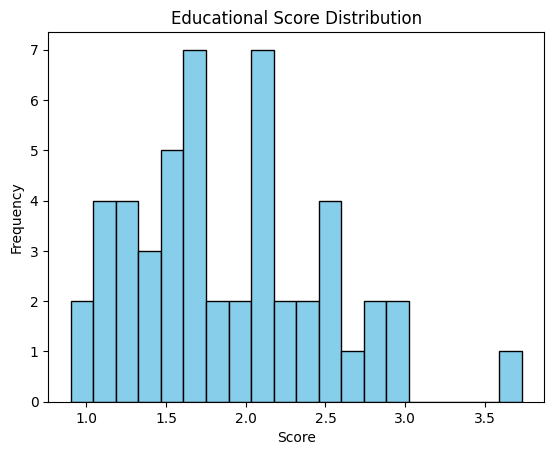

In [142]:
plt.hist(df_filtered["educational_score"], bins=20, color="skyblue", edgecolor="black")
plt.title("Educational Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.savefig("score_histogram_real.png", dpi=300)

In [144]:
std_base = df["base_tokens"].std()
std_evolved = df["evolved_tokens"].std()

print("STD Base:", std_base)
print("STD Evolved:", std_evolved)

STD Base: 3.3635881867725836
STD Evolved: 11.256719126379412


In [143]:
print("Initial count:", initial_count)
print("Filtered count:", filtered_count)
print("Avg base tokens:", df["base_tokens"].mean())
print("Avg evolved tokens:", df["evolved_tokens"].mean())
print("Avg TTR:", df["ttr"].mean())
print("Distinct bigrams:", distinct_bigram_count)

Initial count: 51
Filtered count: 50
Avg base tokens: 15.254901960784315
Avg evolved tokens: 37.254901960784316
Avg TTR: 0.8591780829365584
Distinct bigrams: 1508


In [145]:
distiset2.push_to_hub("ashishkattamuri/evolved-instruction-dataset")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/570 [00:00<?, ?B/s]